In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Defining functions

In [ ]:
def get_image_paths(data_path):
  folders = glob.glob(data_path)

  num_img = 0
  data_col = []

  for folder in folders:
      for f in glob.glob(folder+'/*.png'):
          num_img = num_img +1
          data_col.append(f)

  print("\nImages found: " + str(num_img))
  return data_col


In [ ]:
def collect_image_data(data_col):
  # Set the array in gray
  data_col_num = []
  data_error_list = []

  for i in range(len(data_col)):
    try:
      data_col_num.append(rgb2gray(resize(imread(data_col[i]), (64,64), anti_aliasing=True)))
    except:
      data_error_list.append(data_col[i])
      print(f"Error: {data_col[i]}")

  return np.array(data_col_num), data_error_list


In [ ]:
def make_predictions(data_col_num):
  #data_col_num = np.array(data_col_num)

  ali_predictions = probability_model.predict(data_col_num)

  ali_data_preds = []
  ali_data_data = []

  for i in range(len(ali_predictions)):
    ali_data_preds.append(np.argmax(ali_predictions[i]))
    ali_data_data.append(ali_predictions[i])

  return ali_data_preds, ali_data_data

## Trying functions on new data

#### Tshirts

In [ ]:
tshirt_path = "/content/drive/MyDrive/ADS_504_machine_learning/group_project/images/sneaker"

print("\nRetrieving images from:")
print(tshirt_path)


Retrieving images from:
/content/drive/MyDrive/ADS_504_machine_learning/group_project/images/sneaker


In [ ]:
%%time
tshirt_step1 = get_image_paths(tshirt_path)


Images found: 3540
CPU times: user 103 ms, sys: 14.3 ms, total: 118 ms
Wall time: 22.4 s


In [ ]:
%%time
tshirt_step2, tshirt_errors = collect_image_data(tshirt_step1)

Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/sneaker/sneaker_2911.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/sneaker/sneaker_2323.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/sneaker/sneaker_1168.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/sneaker/sneaker_1221.png
CPU times: user 18.1 s, sys: 786 ms, total: 18.9 s
Wall time: 1min 16s


In [ ]:
%%time
tshirt_preds, tshirt_data = make_predictions(tshirt_step2)

111/111 [==============================] - 0s 2ms/step
CPU times: user 328 ms, sys: 34.6 ms, total: 362 ms
Wall time: 323 ms


In [ ]:
dennis_num = 0

for i in class_names:
  print(f"Dennis number: {dennis_num} for {i}")
  dennis_num += 1

Dennis number: 0 for T-shirt/top
Dennis number: 1 for Trouser
Dennis number: 2 for Pullover
Dennis number: 3 for Dress
Dennis number: 4 for Coat
Dennis number: 5 for Sandal
Dennis number: 6 for Shirt
Dennis number: 7 for Sneaker
Dennis number: 8 for Bag
Dennis number: 9 for Ankle boot


<Axes: >

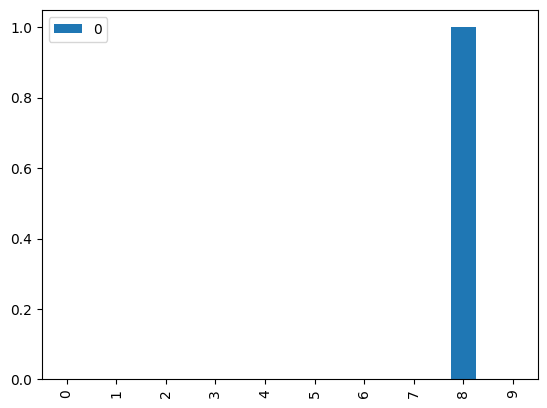

In [ ]:
pd.DataFrame(tshirt_data[2]).plot.bar()

In [ ]:
import seaborn as sns

In [ ]:
def training_set_maker(item):
  data_path = f"/content/drive/MyDrive/ADS_504_machine_learning/group_project/images/{item}"
  data_step1 = get_image_paths(data_path)
  data_step2, data_errors = collect_image_data(data_step1)
  data_labels = [item for i in range(len(data_step2))]
  return data_step2, data_labels, data_errors


In [ ]:
%%time
bag_set, bag_labels, bag_errors = training_set_maker('bag')
belt_set, belt_labels, belt_errors = training_set_maker('belt')
boot_set, boot_labels, boot_errors = training_set_maker('boot')
coat_set, coat_labels, coat_errors = training_set_maker('coat')
dress_set, dress_labels, dress_errors = training_set_maker('dress')
hat_set, hat_labels, hat_errors = training_set_maker('hat')
polo_set, polo_labels, polo_errors = training_set_maker('polo')
pullover_set, pullover_labels, pullover_errors = training_set_maker('pullover')
sandal_set, sandal_labels, sandal_errors = training_set_maker('sandal')
shorts_set, shorts_labels, shorts_errors = training_set_maker('shorts')
sneaker_set, sneaker_labels, sneaker_errors = training_set_maker('sneaker')
socks_set, socks_labels, socks_errors = training_set_maker('socks')
sunglasses_set, sunglasses_labels, sunglasses_errors = training_set_maker('sunglasses')
trouser_set, trouser_labels, trouser_errors = training_set_maker('trouser')
tshirt_set, tshirt_labels, tshirt_errors = training_set_maker('tshirt')
underwear_set, underwear_labels, underwear_errors = training_set_maker('underwear')



Images found: 3535
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/bag/bag_1854.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/bag/bag_1397.png

Images found: 3538
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/belt/belt_2809.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/belt/belt_2857.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/belt/belt_2997.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/belt/belt_2337.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/belt/belt_787.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/belt/belt_99.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/belt/belt_173.png
Error: /content/drive/MyDrive/ADS_504_machine_learning/group_project/images/belt/belt_174.png
Error: /content/dri

In [ ]:
full_image_data_set = np.concatenate((bag_set, belt_set, boot_set, coat_set,
dress_set,hat_set, polo_set, pullover_set,
sandal_set, shorts_set, sneaker_set, socks_set,
sunglasses_set, trouser_set, tshirt_set, underwear_set))

In [ ]:
full_image_data_set.shape

(55963, 64, 64)

In [ ]:
full_labels_set = np.concatenate((bag_labels, belt_labels, boot_labels, coat_labels,
dress_labels, hat_labels, polo_labels, pullover_labels,
sandal_labels, shorts_labels, sneaker_labels, socks_labels,
sunglasses_labels, trouser_labels, tshirt_labels, underwear_labels))

In [ ]:
pd.DataFrame(full_labels_set)[0].value_counts()

sneaker       3536
sunglasses    3535
bag           3533
boot          3533
sandal        3532
coat          3531
socks         3531
belt          3528
hat           3528
dress         3527
shorts        3527
pullover      3521
trouser       3521
tshirt        3518
polo          3456
underwear     3106
Name: 0, dtype: int64

In [ ]:
full_errors_set = np.concatenate((bag_errors, belt_errors, boot_errors, coat_errors,
dress_errors, hat_errors, polo_errors, pullover_errors,
sandal_errors, shorts_errors, sneaker_errors, socks_errors,
sunglasses_errors, trouser_errors, tshirt_errors, underwear_errors))

In [ ]:
type(full_errors_set)

numpy.ndarray

In [ ]:
type(full_labels_set)

numpy.ndarray

In [ ]:
transdict = {'tshirt' : 0, 'trouser' : 1,
 'pullover' : 2,  'dress' : 3,
 'coat' : 4,     'sandal' : 5,
 'shirt' : 6,  'sneaker' : 7,
 'bag' : 8,  'boot' : 9,
 'sunglasses' : 10, 'socks' : 11,
 'belt' : 12, 'hat' : 13,
 'shorts' : 14, 'polo' : 15,
 'underwear' : 16
}

In [ ]:
raw_class_names = ['tshirt', 'trouser',
 'pullover',  'dress',
 'coat',     'sandal' ,
 'shirt',  'sneaker' ,
 'bag',  'boot' ,
 'sunglasses' , 'socks',
 'belt', 'hat',
 'shorts', 'polo',
 'underwear'
]

In [ ]:
full_labels_translated = np.array([ transdict[item] for item in full_labels_set])

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (64,64)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(17)
])

model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(full_image_data_set, full_labels_translated, epochs = 10)

Epoch 1/10
1749/1749 [==============================] - 12s 7ms/step - loss: 2.6063 - accuracy: 0.1544
Epoch 2/10
1749/1749 [==============================] - 12s 7ms/step - loss: 2.5055 - accuracy: 0.1864
Epoch 3/10
1749/1749 [==============================] - 12s 7ms/step - loss: 2.4814 - accuracy: 0.1984
Epoch 4/10
1749/1749 [==============================] - 12s 7ms/step - loss: 2.4711 - accuracy: 0.2003
Epoch 5/10
1749/1749 [==============================] - 12s 7ms/step - loss: 2.4613 - accuracy: 0.2065
Epoch 6/10
1749/1749 [==============================] - 11s 6ms/step - loss: 2.4571 - accuracy: 0.2074
Epoch 7/10
1749/1749 [==============================] - 12s 7ms/step - loss: 2.4517 - accuracy: 0.2096
Epoch 8/10
1749/1749 [==============================] - 12s 7ms/step - loss: 2.4484 - accuracy: 0.2117
Epoch 9/10
1749/1749 [==============================] - 12s 7ms/step - loss: 2.4442 - accuracy: 0.2134
Epoch 10/10
1749/1749 [==============================] - 12s 7ms/step - l

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(train_images)

1875/1875 [==============================] - 5s 3ms/step


In [ ]:
pred_labels = [np.argmax(i) for i in predictions]

In [ ]:
accuracy_score(pred_labels, train_labels)

0.09916666666666667

In [ ]:
print(classification_report(pred_labels, train_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.00      0.00      0.00        20
           2       0.04      0.05      0.04      5388
           3       0.33      0.17      0.22     11910
           4       0.00      0.00      0.00         0
           5       0.00      0.01      0.00       308
           6       0.00      0.00      0.00         0
           7       0.62      0.09      0.15     41985
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00       167
          11       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         4

    accuracy                           0.10     60000
   macro avg       0.07      0.02      0.03     60000
weighted avg       0.50      0.10      0.16     60000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print(confusion_matrix(pred_labels, train_labels))

[[   0    0    1    0    0  167    0   31    0    0    0    0    0    0]
 [   2    0    0    0    0   15    1    0    2    0    0    0    0    0]
 [ 657  392  248 1274  165 1003  461 1028  131   29    0    0    0    0]
 [ 875 5080  274 2002  194 1452  694 1245   75   19    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  62  182   20    7    4    4   20    0    9    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [4344  345 5455 2662 5635 3340 4814 3696 5742 5952    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   5    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  49    1    2   54    2   11    8    0   40    0    0    0    0    0]
 [   4    0    0    1    0    0    2    0    1    0    0    0    0    0]
 [   2    0    0    0    0    4    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    4    0    0    0    0

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
2+2

4

In [ ]:
from numpy import save

In [ ]:
save('/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/raw_image_data.npy',full_image_data_set)

save('/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/raw_image_labels.npy',full_labels_set)

save('/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/raw_image_errors.npy',full_errors_set)